In [12]:
%pylab inline
import networkx as nx
from networkx.generators.classic import complete_graph
from networkx.generators.random_graphs import random_regular_graph

Populating the interactive namespace from numpy and matplotlib


In [55]:
G = random_regular_graph(5,100)

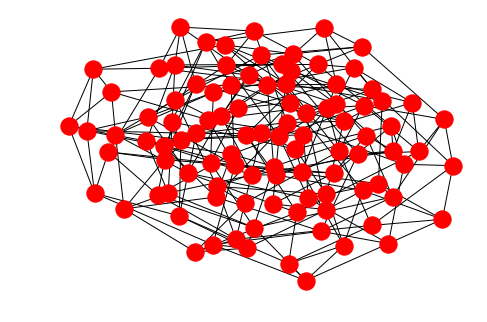

In [71]:
nx.draw(G)

### Initialize the invader

In [165]:

#     print(G.nodes[node]['name'])

16


In [167]:
chosen = 64 #np.random.randint(100)
get_neighbours_list(chosen)

[97, 24, 98, 16, 13]

In [21]:
def get_neighbours_list(G,node):
    adj = [(n,nbrdict) for n, nbrdict in G.adjacency() if n==node]
    return list(adj[0][1].keys())

def death_birth_fitness(G,node):
    b = 10
    c = 1
    C_fitness = D_fitness = 0
    # get all neighbours of cell
    neighbours = get_neighbours_list(G,node)
    for nbr in neighbours:
        # find it's neighbours
        nbr_list = get_neighbours_list(G,nbr)
        num_C = num_D = 0
        for nb in nbr_list:
            if G.nodes[nb]['name'] == 'C':
                num_C += 1
            elif G.nodes[nb]['name'] == 'D':
                num_D += 1
        fitness = num_C*b - c*(num_C+num_D)
        if G.nodes[nbr]['name'] == 'C':
                C_fitness += fitness
        elif G.nodes[nbr]['name'] == 'D':
                D_fitness += fitness
    fitnesses = [C_fitness, D_fitness]
    return np.array(fitnesses)/sum(fitnesses)
def count_frequencies(G):
    num_C = num_D = 0
    for node in G:
        if G.nodes[node]['name'] == 'C':
                num_C += 1
        elif G.nodes[node]['name'] == 'D':
                num_D += 1
    nums = [num_C, num_D]
    return np.array(nums)/sum(nums)

def list_players(G):
    players = []
    for node in G:
        players.append(G.nodes[node]['name'])
    return players
def evolve(graph):
    hist = []
    while count_frequencies(graph)[0] not in [0.0,1.0]:
        chosen = np.random.randint(0,100)
        fn_C = death_birth_fitness(graph,chosen)[0]    
        hist.append(count_frequencies(graph)[0])
        F.nodes[chosen]['name'] = 'C' if np.random.random() < fn_C else 'D'
    plot(hist)

In [180]:
count_frequencies(G)

array([0.01, 0.99])

### Starting the evolution


In [ ]:
invader = np.random.randint(100)
G = random_regular_graph(4,100)
print(invader)
for node in G:
    G.nodes[node]['name'] = 'C' if node == invader else 'D'
evolve(G)

27


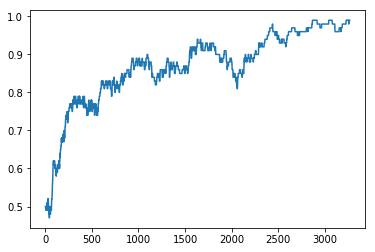

In [25]:
F = random_regular_graph(5,100)
for node in F:
    F.nodes[node]['name'] = 'C' if node %2 else 'D'
evolve(F)